In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
def load_dataset(filename):

    with open(filename,'r') as dest_f:
        data_iter = csv.reader(dest_f, delimiter = ',', quotechar = '"')
        data = [data for data in data_iter]
        data_array = np.asarray(data)
        
    return data_array

def load_pd_dataset(filename):
    data = pd.read_csv(filename)
    return data

In [3]:
dataset = load_pd_dataset('crypto-markets.csv')

In [8]:
dataset.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,702166.000000,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05,7.021660e+05
mean,734.561943,2.696117e+02,3.284954e+02,2.210024e+02,2.694796e+02,5.544493e+06,1.202024e+08,-inf,1.074927e+02
std,411.195482,1.219343e+04,1.558344e+04,9.686538e+03,1.217104e+04,1.673788e+08,3.074096e+09,NaN,7.207118e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,397.000000,5.280000e-04,6.210000e-04,4.550000e-04,5.290000e-04,2.700000e+01,7.095000e+03,1.429000e-01,0.000000e+00
50%,746.000000,8.753000e-03,1.016400e-02,7.630000e-03,8.768000e-03,5.030000e+02,9.402450e+04,4.331000e-01,0.000000e+00
75%,1032.000000,1.333997e-01,1.523455e-01,1.170855e-01,1.336785e-01,1.325400e+04,1.326118e+06,7.703000e-01,3.000000e-02
max,1516.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [15]:
dataset.groupby('name').describe()

close                                          \
                      count          mean           std         min   
name                                                                  
0x                    190.0      0.603211      0.587125    0.170806   
2GIVE                 647.0      0.003816      0.005952    0.000098   
300 Token             212.0    408.698019    305.042387  121.510000   
42-coin              1485.0  14050.421010  50245.692028   20.720000   
808Coin               576.0      0.000556      0.000677    0.000048   
8Bit                 1040.0      0.129134      0.215443    0.007803   
ACChain                12.0      2.164167      0.572863    1.090000   
AI Doctor              43.0      0.106441      0.041267    0.059695   
AICHAIN                37.0      0.086522      0.021983    0.053328   
ALIS                  133.0      0.539169      0.261994    0.178447   
ALQO                   94.0      0.909390      0.747350    0.039978   
ANRYZE                 87.0      0.021758      0.008046    0.010159   
APX                   273.0      8.135165      3.478643    3.160000   
ARbit                 939.0      0.003414      0.003821    0.000152   
ATBCoin               156.0      0.776381      0.284247    0.314052   
ATLANT                113.0      0.508798      0.458302    0.141297   
ATMChain              141.0      0.023236      0.009392    0.009163   
ATMCoin               174.0      3.342904      2.470486    0.644921   
ATN                    41.0      1.332435      0.244921    0.840738   
AWARE                  39.0      0.040091      0.015053    0.022713   
Abjcoin                99.0      0.372823      0.373753    0.021468   
Abncoin               397.0      0.219909      0.531164    0.007263   
Accelerator Network    89.0      9.043034      4.919382    2.310000   
Ace                    56.0      0.583274      0.280003    0.324266   
Aces                  544.0      0.000285      0.001019    0.000006   
Achain                149.0      0.315897      0.263403    0.036411   
Acoin                1140.0      0.034874      0.061559    0.000685   
Acute Angle Cloud      33.0      0.181961      0.021967    0.144514   
AdCoin                181.0      0.146184      0.075156    0.042325   
AdEx                  236.0      1.144957      0.749421    0.111695   
...                     ...           ...           ...         ...   
aelf                   63.0      1.498786      0.402226    0.808838   
bitBTC               1166.0   2160.536192   3853.903991  180.900000   
bitCNY               1228.0      0.155001      0.046727    0.042337   
bitEUR                827.0      1.145368      0.087846    0.852036   
bitGold              1002.0   1348.921597    160.707981  993.640000   
bitJob                 99.0      0.075201      0.048064    0.020172   
bitSilver             961.0     18.573163      2.995913   13.490000   
bitUSD               1209.0      1.019149      0.062941    0.496361   
bitqy                 179.0      0.017103      0.013131    0.003148   
carVertical            31.0      0.009267      0.003775    0.005323   
district0x            203.0      0.091241      0.070019    0.015591   
e-Gulden             1429.0      0.041232      0.076011    0.000956   
eBitcoin              114.0      0.545106      0.457659    0.069427   
eBitcoinCash           97.0      0.075087      0.054988    0.006207   
eBoost                261.0      0.236896      0.276599    0.063771   
eGold                 113.0      0.029856      0.035254    0.002237   
iBank                 374.0      0.003675      0.003935    0.000331   
iCoin                 551.0      0.006174      0.012309    0.000009   
iDice                 244.0      0.363521      0.378489    0.030216   
iEthereum             118.0      0.037651      0.043229    0.002684   
iExec RLC             308.0      0.848015      0.644418    0.277964   
iQuant                156.0      0.235334      0.115767    0.078729   
iTicoin               286.0     22.548497     

In [39]:
dataset['name'].describe()

count       702166
unique        1514
top       HempCoin
freq          2030
Name: name, dtype: object

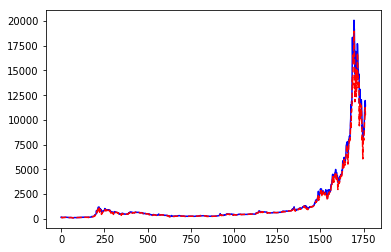

In [53]:
import matplotlib.pyplot as plt
d = dataset[dataset['name'] == 'Bitcoin']
plt.plot(d['high'],'b',d['low'],'r--')
plt.show()
# plt.lagends()

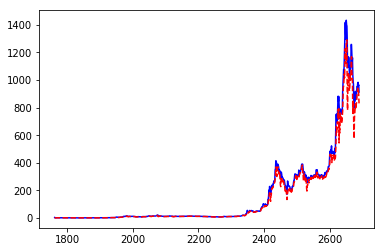

In [51]:
import matplotlib.pyplot as plt
d = dataset[dataset['name'] == 'Ethereum']
plt.plot(d['high'],'b',d['low'],'r--')
plt.show()

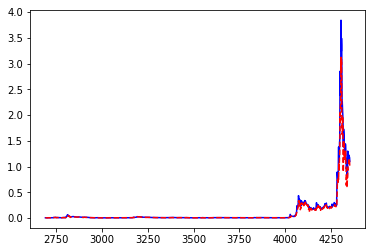

In [52]:
import matplotlib.pyplot as plt
d = dataset[dataset['name'] == 'Ripple']
plt.plot(d['high'],'b',d['low'],'r--')
plt.show()

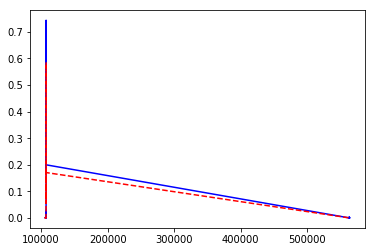

In [54]:
import matplotlib.pyplot as plt
d = dataset[dataset['name'] == 'HempCoin']
plt.plot(d['high'],'b',d['low'],'r--')
plt.show()

In [82]:
import pandas as pd
scaler = MinMaxScaler()
dat = dataset[['open','high', 'low', 'close']]
scaler.fit(dat)
dat = scaler.transform(dat)
commonScaleData = pd.DataFrame(dat,columns=['open','high', 'low', 'close'])
namesDF = pd.DataFrame(dataset['name'],columns = ['name'])
dat=pd.concat([ namesDF, commonScaleData ], axis=1)
# commonScaleData

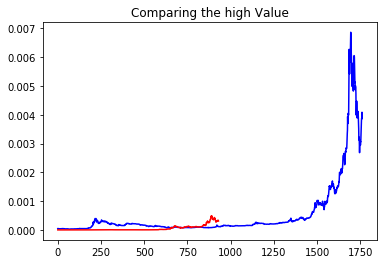

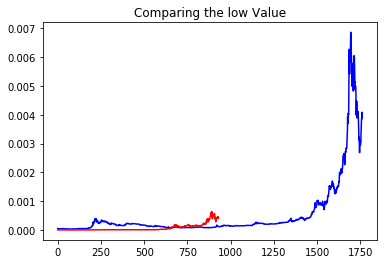

In [146]:
import matplotlib.pyplot as plt
selectedBitcoin = dat[dat['name'] == 'Bitcoin']
selectedHempCoin = dat[dat['name'] == 'HempCoin']
selectedEthereum = dat[dat['name'] == 'Ethereum']
selectedRipple = dat[dat['name'] == 'Ripple']
Bitcoin = pd.DataFrame(Bitcoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
Ethereum = pd.DataFrame(Ethereum.as_matrix(), columns = ['name','open','high', 'low', 'close'])
HempCoin = pd.DataFrame(HempCoin.as_matrix(), columns = ['name','open','high', 'low', 'close'])
Ripple = pd.DataFrame(Ripple.as_matrix(), columns = ['name','open','high', 'low', 'close'])
plt.title('Comparing the high Value')
plt.plot(Bitcoin['high'],'b',Ethereum['high'], 'r' )
plt.show()
plt.title('Comparing the low Value')
plt.plot(Bitcoin['high'],'b', Ethereum['low'], 'r' )
plt.show()




In [148]:
dataset

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.300000,135.980000,132.100000,134.210000,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.440000,147.490000,134.000000,144.540000,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.000000,146.930000,134.050000,139.000000,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.000000,139.890000,107.720000,116.990000,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.380000,125.600000,92.280000,105.210000,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.250000,108.130000,79.100000,97.750000,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.100000,115.000000,92.500000,112.500000,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.900000,118.800000,107.140000,115.910000,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.980000,124.660000,106.640000,112.300000,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.250000,113.440000,97.700000,111.500000,0,1248470000,0.8767,15.74


In [200]:
# grouping data first on the basis on date and then on the basis of name, then depicting the market mean of this data
#  
marketData = dataset.groupby(['date', 'name']).mean().unstack()
# makretData = marketData.unstack()
# ['market'].mean().unstack()
# plt.plot(marketData['high'])
# plt.show()
makretData

ranknow                                                             \
name            0x  2GIVE 300 Token 42-coin 808Coin    8Bit ACChain AI Doctor   
date                                                                            
2013-04-28     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-29     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-04-30     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-01     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-02     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-03     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-04     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-05     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-06     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-07     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-08     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-09     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-10     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-11     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-12     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-13     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-14     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-15     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-16     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-17     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-18     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-19     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-20     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-21     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-22     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-23     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-24     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-25     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-26     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
2013-05-27     NaN    NaN       NaN     NaN     NaN     NaN     NaN       NaN   
...            ...    ...       ...     ...     ...     ...     ...       ...   
2018-01-23    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-24    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-25    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-26    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-27    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-28    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-29    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-30    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-01-31    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-01    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-02    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-03    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-04    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-05    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-06    44.0  552.0     909.0   660.0   789.0  1012.0     NaN    1185.0   
2018-02-07    44.0  552.0     909.0   660.

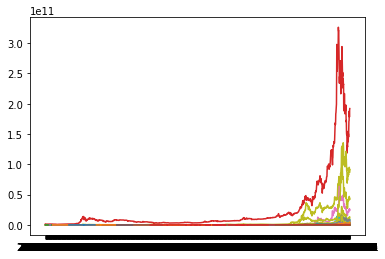

In [180]:
plt.show()

In [227]:
# Ordered most frequent currencies
marketData = dataset.groupby(['name'])['market']
marketData = marketData.last()
OrderedmarketData = marketData.sort_values(ascending=False)
# OrderedMostFrequencyIndexes = marketData.sort_values(ascending=False).index
# MostFrequentOrderedData = dataset[dataset['name'].isin(OrderedMostFrequencyIndexes)]
# marketData = marketData.head(5)
# marketData
top_5_frquennt_currencies_names = OrderedmarketData.head(5).index
top_5_frequent_currencies_allData = dataset[dataset['name'].isin(top_5_frquennt_currencies_names)]
# top 5 frequent data
# OrderedmarketData.head
top_5_frequent_currencies_allData

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0,1180070000,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0,1089890000,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0,1254760000,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0,1289470000,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0,1248470000,0.8767,15.74


In [229]:
# fig = plt.figure(figsize=(18, 20))
# will plot top 5 currencies 
plt.plot(top_5_frequent_currencies_allData.groupby(['date', 'name']).last().unstack())
plt.show()

KeyboardInterrupt: 

In [ ]:
marketData.groupby(['date', 'name'])['market_billion'].mean().unstack().plot();